# Matplotlib Cheat Sheet

In [2]:
# Updated 2023/01/21
import numpy as np
import matplotlib.pyplot as plt

## Simple Plot

<IPython.core.display.Javascript object>


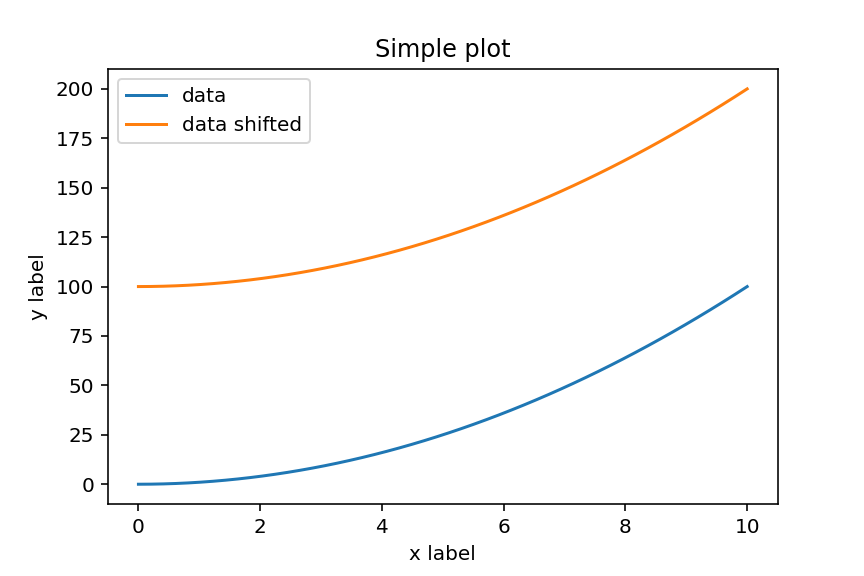

In [77]:
fig, ax = plt.subplots()

x = np.linspace(0,10)

ax.plot(x, x**2, label='data')
ax.plot(x, x**2+100, label='data shifted')

ax.set_xlabel('x label') # support LaTeX: '$ [LaTeX here] $'
ax.set_ylabel('y label')
ax.set_title('Simple plot')

ax.legend()
# ax.grid()

plt.savefig('fig.png', bbox_inches='tight') # always save before show
plt.show()

## Reset to default plot style

In [102]:
plt.style.use('default')

## Colors

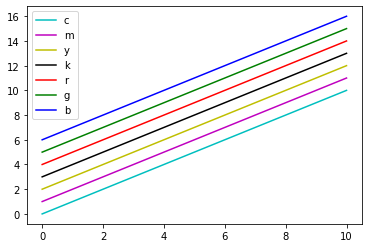

In [23]:
# quick colors
fig, ax = plt.subplots()

x = np.linspace(0,10)

c = ['c','m','y','k','r','g','b']
for i in range(len(c)):
    ax.plot(x, x+i, f'{c[i]}', label=f'{c[i]}')

ax.legend()
plt.show()

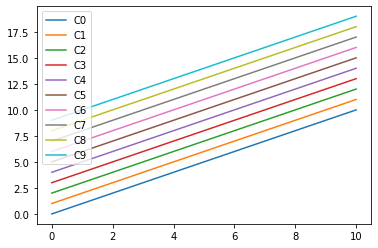

In [25]:
# default color cycle
fig, ax = plt.subplots()

x = np.linspace(0,10)

for i in range(10):
    ax.plot(x, x+i, f'C{i}', label=f'C{i}')

ax.legend()
plt.show()

## Markers
```
.  point marker              <  triangle_left marker       4  tri_right marker          *  star marker      
,  pixel marker              >  triangle_right marker      8  octagon marker            h  hexagon1 marker  
o  circle marker             1  tri_down marker            s  square marker             H  hexagon2 marker   
v  triangle_down marker      2  tri_up marker              p  pentagon marker           +  plus marker
^  triangle_up marker        3  tri_left marker            P  plus (filled) marker      x  x marker
X  x (filled) marker         D  diamond marker             |  vline marker              _  hline marker
```

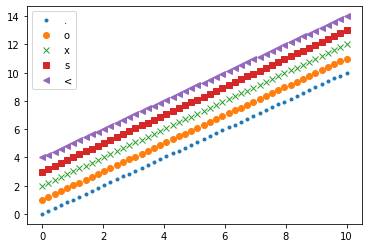

In [35]:
fig, ax = plt.subplots()

x = np.linspace(0,10)

m = ['.','o','x','s','<']
for i in range(len(m)):
    ax.plot(x, x+i, f'{m[i]}', label=f'{m[i]}')

ax.legend()
plt.show()

## Line style
```
-          solid line style
--         dashed line style
-.         dash-dot line style
:          dotted line style
```

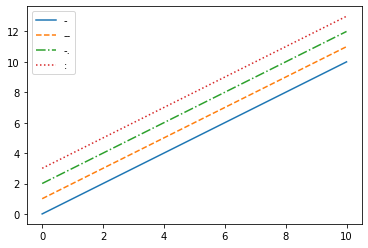

In [37]:
fig, ax = plt.subplots()

x = np.linspace(0,10)

ls = ['-','--','-.',':']
for i in range(len(ls)):
    ax.plot(x, x+i, f'{ls[i]}', label=f'{ls[i]}')

ax.legend()
plt.show()

## Axis limits, ticks, and scales

## Subplots

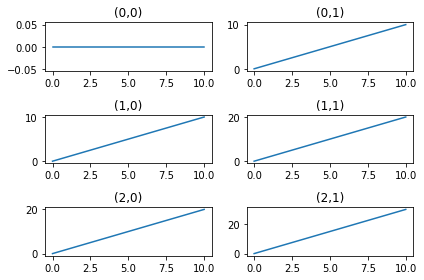

In [100]:
fig, ax = plt.subplots(3,2)

x = np.linspace(0,10)

for row in range(3):
    for col in range(2):
        ax[row][col].plot(x,(row+col)*x)
        ax[row][col].set_title(f'({row},{col})')
        
plt.tight_layout() #adjust padding
plt.show()

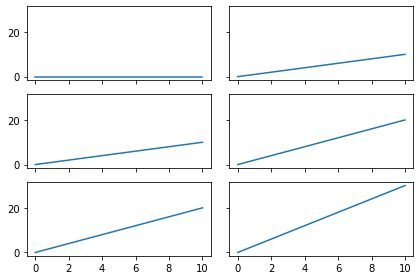

In [101]:
# all subplots sharing the same x/y axis
fig, ax = plt.subplots(3,2, sharex=True, sharey=True)

x = np.linspace(0,10)

for row in range(3):
    for col in range(2):
        ax[row][col].plot(x,(row+col)*x)

plt.tight_layout() #adjust padding
plt.show()

## Vertical and horizontal lines

## Legend location

## Line magic

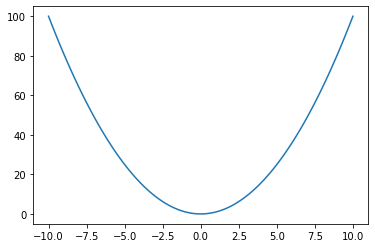

In [64]:
%matplotlib inline

fig, ax = plt.subplots()
x = np.linspace(-10, 10,100)
ax.plot(x, x**2)
plt.show()

<IPython.core.display.Javascript object>


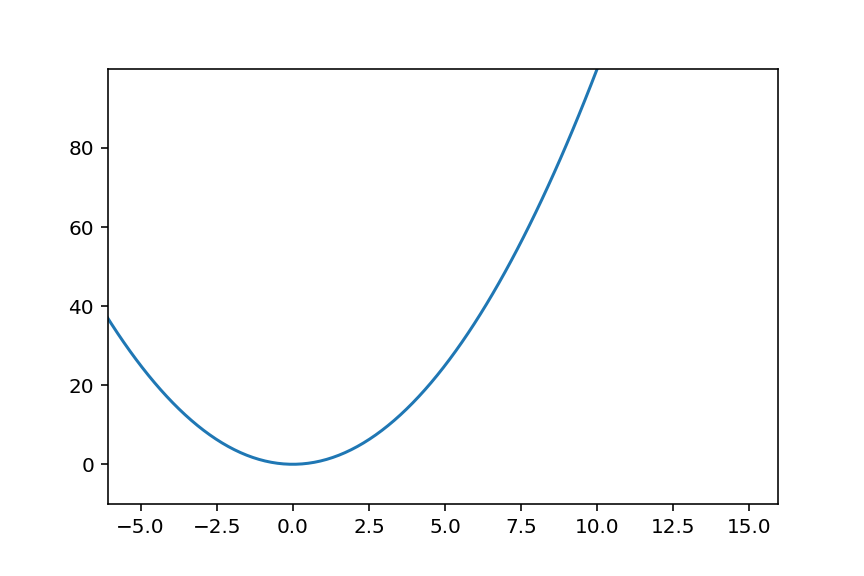

In [62]:
%matplotlib notebook

fig, ax = plt.subplots()
x = np.linspace(-10, 10,100)
ax.plot(x, x**2)
plt.show()

In [81]:
# reset to inline
%matplotlib inline

## Interaction with widgets

<IPython.core.display.Javascript object>


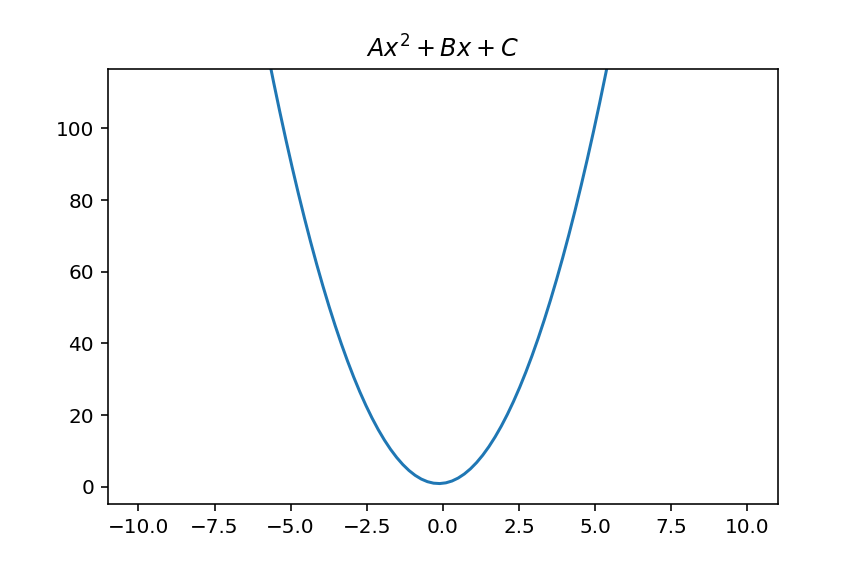

interactive(children=(FloatSlider(value=1.0, description='A:', max=10.0), FloatSlider(value=1.0, description='…

In [79]:
%matplotlib notebook
import ipywidgets as widgets

x = np.linspace(-10, 10,100)

def f(x, A, B, C):
    return A*x**2 + B*x + C

fig, ax = plt.subplots()
line, = ax.plot(x, f(x,1,1,1))
ax.set_title('$Ax^2 + Bx + C$')

a_slider = widgets.FloatSlider(value=1,min=0,max=10,description='A:')
b_slider = widgets.FloatSlider(value=1,min=0,max=10,description='B:')
c_slider = widgets.FloatSlider(value=1,min=0,max=10,description='C:')

@widgets.interact(A=a_slider, B=b_slider, C=c_slider)
def update(A, B, C):
    line.set_ydata(f(x,A,B,C))

## Animation

In [5]:
from matplotlib.animation import FuncAnimation
from IPython import display

fig, ax = plt.subplots()

x = np.linspace(0,30,200)

line1, = ax.plot(x,np.sin(x))
line2, = ax.plot(x,np.cos(x))

def animate(i, A1, A2):
    # A1, A2 are optional fargs
    print(f'Frame: {i}', end='\r')
    
    # or set_data, set_xdata
    line1.set_ydata(np.sin(x+i*A1/180)) 
    line2.set_ydata(np.cos(x+i*A2/180)) 
    
    # the limits do not change after initial call to plot
    # if new data is outside the original limits, we can autoscale dynamically
    ax.relim()
    ax.autoscale(True)
    
    return line1, line2, # return modified plot elements for blitting
    
anim = FuncAnimation(fig,animate,fargs=(15,5),frames=100,interval=50,blit=True)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()    